# Circular and Elliptical Orbits ($e < 1$)

For circular and elliptical orbits, combining Eq. {eq}`eq:time-since-periapsis` and Eq. {eq}`eq:time-since-periapsis-rhs-e-lt-1` results in:

:::{math}
:label: eq:time-since-periapsis-ellipse
\frac{\mu}{h^3}t = \frac{1}{\left(1 - e^2\right)^{3/2}}\left[2\tan^{-1}\left(\sqrt{\frac{1 - e}{1 + e}}\tan\frac{\nu}{2}\right)-\frac{e\sqrt{1 - e^2}\sin \nu}{1 + e \cos \nu}\right]
:::

## Mean Anomaly

We define the term in the square brackets in Eq. {eq}`eq:time-since-periapsis-ellipse` to be the **mean anomaly**, $M_e$, where the subscript $e$ indicates that this is for the ellipse. We will have different equations for the parabola and hyperbola.

:::{math}
:label: eq:mean-anomaly-ellipse
M_e = \left[2\tan^{-1}\left(\sqrt{\frac{1 - e}{1 + e}}\tan\frac{\nu}{2}\right)-\frac{e\sqrt{1 - e^2}\sin \nu}{1 + e \cos \nu}\right]
:::

The mean anomaly is a monotonically increasing function of the true anomaly, as shown in {numref}`fig:mean-vs-true-anomaly-ellipse`. This is good because it means that $M_e$ can be used in place of $\nu$ for all four quadrants on the $x$-$y$ plane. If $M_e$ had a peak, we would have to be concerned about which quadrant we were in.

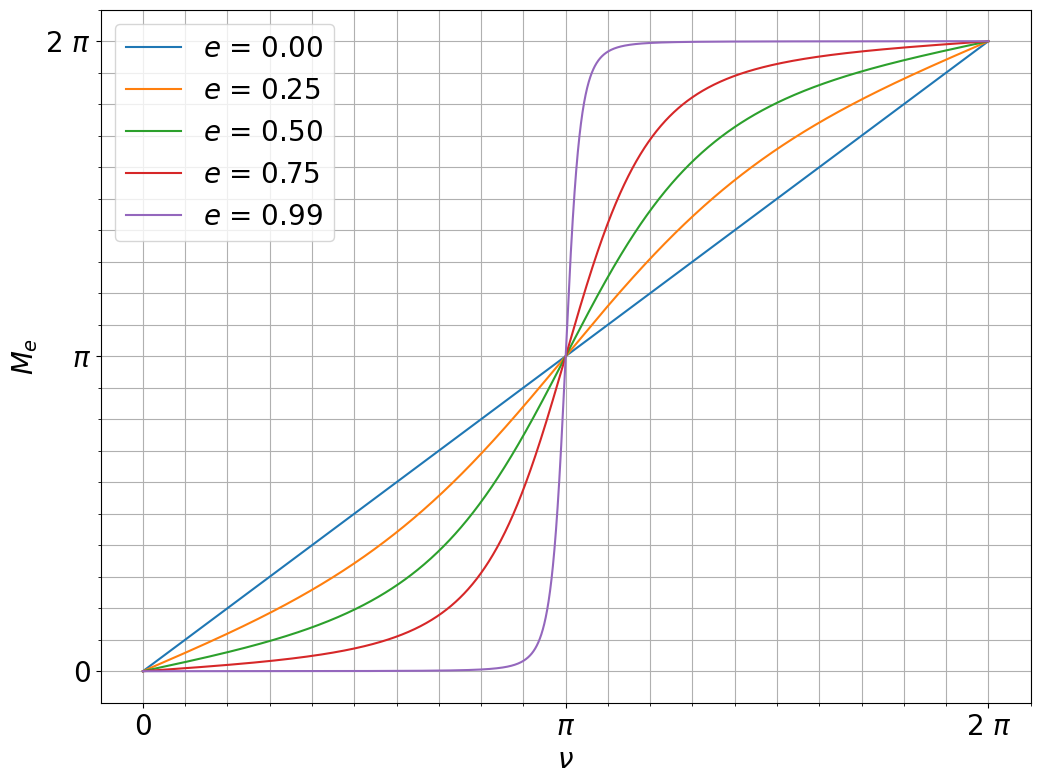

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FuncFormatter,
                               AutoMinorLocator)
plt.rc("font", size=20)

n_points = 500
e_vals = np.array((0, 0.25, 0.5, 0.75, 0.99))
E = np.linspace(0, np.pi, n_points)

fig_2, ax_2 = plt.subplots(figsize=(12, 9))
ax_2.set_ylabel("$M_e$")
ax_2.set_xlabel(r"$\nu$")
ax_2.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax_2.xaxis.set_major_formatter(FuncFormatter(lambda val, pos: {0: "0", np.pi: r"$\pi$", 2*np.pi: r"2 $\pi$"}.get(val, "")))
ax_2.yaxis.set_major_locator(MultipleLocator(base=np.pi))
ax_2.yaxis.set_major_formatter(FuncFormatter(lambda val, pos: {0: "0", np.pi: r"$\pi$", 2*np.pi: r"2 $\pi$"}.get(val, "")))
ax_2.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax_2.yaxis.set_minor_locator(AutoMinorLocator(n=10))
ax_2.grid(which="both")
for e in e_vals:
    M_e = E - e * np.sin(E)
    nu = np.arccos((e - np.cos(E)) / (e * np.cos(E) - 1))
    M_e = np.hstack((M_e, 2 * np.pi - M_e[::-1]))
    nu = np.hstack((nu, 2 * np.pi - nu[::-1]))
    ax_2.plot(nu, M_e, label=f"$e$ = {e:.2F}")

ax_2.legend()
from myst_nb import glue
glue("mean-vs-true-anomaly-ellipse", fig_2, display=False)

:::{glue:figure} mean-vs-true-anomaly-ellipse
:name: fig:mean-vs-true-anomaly-ellipse

Mean anomaly as a function of true anomaly for a range of eccentricities. Note that $e < 1$.
:::

Notice that when $e = 0$ (a circular orbit), the mean anomaly and true anomaly are equal.

Plugging Eq. {eq}`eq:mean-anomaly-ellipse` into Eq. {eq}`eq:time-since-periapsis-ellipse` and solving for $M_e$, we find:

:::{math}
:label:
M_e = \frac{\mu^2}{h^3} t \left(1 - e^2\right)^{3/2}
:::

If we know the period of the orbit, we can simplify the equation for the mean anomaly:

:::{math}
:label: eq:mean-anomaly-ellipse-period
M_e = \frac{2\pi}{T}t
:::

For a circle, the mean anomaly equals the true anomaly:

:::{math}
:label: eq:true-anomaly-time-circle
\nu_{\text{circle}} = \frac{2\pi}{T} t
:::

Further solution is not needed if the orbit is circular.

## Eccentric Anomaly

We can simplify the equation for $M_e$ even further by using an auxiliary angle, $E$, called the eccentric anomaly. $E$ is defined as the angle from the $x$ axis to a point on a circle that circumscribes the orbital ellipse and where the point is located vertically above a point with true anomaly $\nu$ on the ellipse. This is shown in {numref}`fig:true-mean-eccentric-anomalies` and {numref}`fig:definition-of-eccentric-anomaly-ellipse`.

:::{figure} ../images/definition-of-eccentric-anomaly-ellipse.svg
:name: fig:definition-of-eccentric-anomaly-ellipse
:width: 75%

The eccentric anomaly. The blue ellipse is the trajectory of the spacecraft; the green circle is circumscribed around the ellipse. Point $O$ is the origin, point $F$ is the focus of the ellipse, point $S$ is the spacecraft, point $P$ is the intersection of the apse line and a perpendicular line through $S$, and point $Q$ is the intersection of the circle and the perpendicular line through $S$.
:::

From {numref}`fig:definition-of-eccentric-anomaly-ellipse`, we see that the distance $OP$ is equal to:

:::{math}
:label: eq:OP-distance-ellipse
OP = ae + FP = a \cos E
:::

where $a$ is the semimajor axis of the ellipse, $e$ is the eccentricity, and the distance $FP$ is related to the true anomaly:

:::{math}
:label: eq:FP-distance-ellipse
FP = r \cos\nu
:::

Combining Eq. {eq}`eq:OP-distance-ellipse` and Eq. {eq}`eq:FP-distance-ellipse`, we find:

:::{math}
:label:
a\cos E = ae + r\cos\nu
:::

Replacing $r$ with the orbit equation in terms of the semimajor axis and simplifying, we find:

:::{math}
:label: eq:cos-eccentric-anomaly-ellipse
\cos E = \frac{e + \cos\nu}{1 + e\cos\nu}
:::

or, solving for $\nu$:

:::{math}
:label:
\cos\nu = \frac{e - \cos E}{e\cos E - 1}
:::

Unfortunately, these equations result in a quadrant ambiguity. We can resolve this by some further trigonometric transformations:

:::{math}
:label: eq:eccentric-anomaly-true-anomaly-ellipse
\tan\frac{E}{2} = \sqrt{\frac{1 - e}{1 + e}}\tan\frac{\nu}{2}
:::

The inverse tangent function is not multivalued for a given value of $\nu$ or $E$, so this resolves the quadrant ambiguity.

```{note}
**Note:** Eq. {eq}`eq:eccentric-anomaly-true-anomaly-ellipse` can be solved in Python with `np.arctan()` and in Matlab with `atan()`. It is not necessary to use `np.arctan2()` or `atan2()`. Make sure all your arguments are in terms of radians!
```

## Kepler's Equation

Some further trigonometry with Eq. {eq}`eq:cos-eccentric-anomaly-ellipse` and Eq. {eq}`eq:eccentric-anomaly-true-anomaly-ellipse` yields **Kepler's Equation**:

:::{math}
:label: eq:keplers-equation-ellipse
M_e = E - e \sin E
:::

This gives the relationship between mean anomaly and eccentric anomaly. The value of $M_e$ monotonically increases as a function of $E$, as shown in {numref}`fig:mean-eccentric-anomaly-ellipse` for several values of $e$.

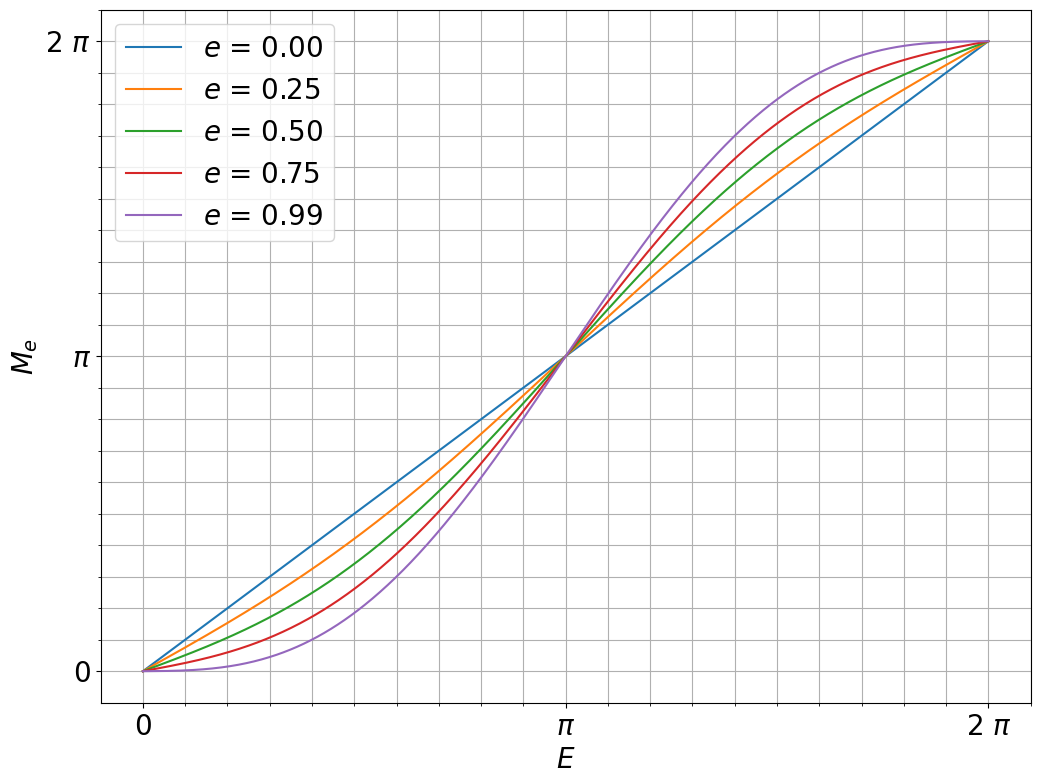

In [2]:
n_points = 500
e_vals = np.array((0, 0.25, 0.5, 0.75, 0.99))
E = np.linspace(0, np.pi, n_points)

fig_1, ax_1 = plt.subplots(figsize=(12, 9))
ax_1.set_xlabel("$E$")
ax_1.set_ylabel(r"$M_e$")
ax_1.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax_1.xaxis.set_major_formatter(FuncFormatter(lambda val, pos: {0: "0", np.pi: r"$\pi$", 2*np.pi: r"2 $\pi$"}.get(val, "")))
ax_1.yaxis.set_major_locator(MultipleLocator(base=np.pi))
ax_1.yaxis.set_major_formatter(FuncFormatter(lambda val, pos: {0: "0", np.pi: r"$\pi$", 2*np.pi: r"2 $\pi$"}.get(val, "")))
ax_1.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax_1.yaxis.set_minor_locator(AutoMinorLocator(n=10))
ax_1.grid(which="both")
for e in e_vals:
    M_e = E - e * np.sin(E)
    M_e = np.hstack((M_e, 2 * np.pi - M_e[::-1]))
    ax_1.plot(np.hstack((E, 2 * np.pi - E[::-1])), M_e, label=f"$e$ = {e:.2F}")

ax_1.legend()
glue("mean-eccentric-anomaly-ellipse", fig_1, display=False)

:::{glue:figure} mean-eccentric-anomaly-ellipse
:name: fig:mean-eccentric-anomaly-ellipse

The mean anomaly as a function of eccentric anomaly for several values of the eccentricity. Note that $e < 1$.
:::

## Solution Procedures

Now we have all the pieces we need to apply the solution procedures discussed in {ref}`the introductory section <sec:time-since-periapsis-solution-procedures>`.

### Given True Anomaly, Find Time Since Periapsis

Given a value of the true anomaly $\nu$, the eccentric anomaly $E$ can be calculated from Eq. {eq}`eq:eccentric-anomaly-true-anomaly-ellipse`. Then, Kepler's Equation can be solved to find $M_e$, and the time since periapsis is found by:

:::{math}
:label:
t = \frac{M_e}{2\pi} T
:::

### Given Time Since Periapsis, Find True Anomaly

If, on the other hand, we are given the time since periapsis and want to find the true anomaly, we must first solve Eq. {eq}`eq:mean-anomaly-ellipse-period` for $M_e$. Then we need to solve Kepler's equation for $E$. Unfortunately, this equation is transcendental in $E$, so it cannot be solved analytically. There are several methods to solve Kepler's equation, depending on the level of accuracy required and the access to computational tools.

Once $E$ is determined, Eq. {eq}`eq:eccentric-anomaly-true-anomaly-ellipse` can be solved for $\nu$.

### Newton's Method to Solve Kepler's Equation

For Newton's method, we seek the roots of a function, $f(E) = 0$. In this case, we can rearrange Kepler's equation as:

:::{math}
:label:
f(E) = E - e\sin E - M_e
:::

It is also convenient to supply the derivative, when it is available, since this improves the convergence rate of the algorithm. The derivative is:

:::{math}
:label:
\frac{d f(E)}{d E} = f'(E) = 1 - e\cos E
:::

These equations can be provided to standard computational solvers for root finding algorithms.

### Infinite Series Solutions of Kepler's Equation

Although there are no analytical solutions for Kepler's equation, several people have developed infinite series solutions. The first was developed by Lagrange:

:::{math}
:label:
E = M_e + \sum_{n = 1}^{\infty}a_n e^n
:::

where the coefficients $a_n$ are given by:

:::{math}
:label:
a_n = \frac{1}{2^{n - 1}} \sum_{k=0}^{\mathrm{floor}(n/2)}(-1)^k\frac{1}{\left(n - k\right)!k!}\left(n - 2k\right)^{n - 1}\sin\left[\left(n - 2k\right)M_e\right]
:::

and where $\mathrm{floor}(x)$ means to take the next lowest integer relative to $x$.

```{margin}
**Note:** Sacchetti {cite}`Sacchetti2020` states that Italian astronomer Francesco Carlini was the first to prove the existence of the convergence limit for the Lagrange series five years before Laplace completed his work. DRAMA!
```

This infinite series converges for $e < 0.6627434193$, a limit that was proven by Laplace, and is therefore typically called the Laplace limit. For larger values of $e$, the series diverges.

Another infinite series was developed by Bessel, which converges for all $e < 1$:

:::{math}
:label:
E = M_e + \sum_{n=1}^{\infty}\frac{2}{n} J_n(ne)\sin n M_e
:::

where $J_n$ are the **Bessel functions of the first kind**, defined by their own infinite series:

:::{math}
:label:
J_n(x) = \sum_{k=0}^{\infty}\frac{\left(-1\right)^k}{k!\left(n + k\right)!}\left(\frac{x}{2}\right)^{n+ k}
:::

There are other feasible series solutions to Kepler's equation, some of which are discussed by Colwell {cite}`Colwell1992`.